In [2]:
import pandas as pd
import ast

In [3]:
data_age = pd.read_csv('data_csv/model_1/prompt_4/data_model1.csv')
data_senti =pd.read_csv('data_csv/senti/data/prompt_4/data_senti.csv')

In [4]:
len(data_age)

1326

In [5]:
len(data_senti)

1326

In [6]:
base = data_senti.loc[data_senti['generator'] == 'base']

In [7]:
base

,Unnamed: 0,image_id,generator,predict_score,map_diff_score_base_0,map_diff_score_base_1,map_diff_score_base_2,map_diff_score_base_3,map_diff_score_base_4
1321,1321,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.17353764 0.8264624 ]],0.000000,0.251113,0.298877,0.180727,0.089054
1322,1322,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.45502028 0.5449797 ]],0.251113,0.000000,0.109365,0.097464,0.231208
1323,1323,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.40954685 0.5904532 ]],0.298877,0.109365,0.000000,0.136140,0.272468
1324,1324,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.47051495 0.52948505]],0.180727,0.097464,0.136140,0.000000,0.154353
1325,1325,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.11765186 0.8823482 ]],0.089054,0.231208,0.272468,0.154353,0.000000


In [8]:
correction = {'base_1': 'map_diff_score_base_0', 'base_3': 'map_diff_score_base_1',
              'base_2': 'map_diff_score_base_2','base_4': 'map_diff_score_base_3', 'base_0': 'map_diff_score_base_4'}

base_pred= {}
index_pred = [1, 3, 2, 4, 0]

In [9]:
el_index = 0
for index, row in base.iterrows():
    value  = (row['predict_score']).replace('[', '').replace(']', '').split()
    name_val = 'base_' + str(index_pred[el_index])
    el_index += 1
    base_pred[name_val] = value[1]

In [10]:
base_pred

{'base_1': '0.8264624',
 'base_3': '0.5449797',
 'base_2': '0.5904532',
 'base_4': '0.52948505',
 'base_0': '0.8823482'}

In [11]:
base

,Unnamed: 0,image_id,generator,predict_score,map_diff_score_base_0,map_diff_score_base_1,map_diff_score_base_2,map_diff_score_base_3,map_diff_score_base_4
1321,1321,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.17353764 0.8264624 ]],0.000000,0.251113,0.298877,0.180727,0.089054
1322,1322,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.45502028 0.5449797 ]],0.251113,0.000000,0.109365,0.097464,0.231208
1323,1323,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.40954685 0.5904532 ]],0.298877,0.109365,0.000000,0.136140,0.272468
1324,1324,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.47051495 0.52948505]],0.180727,0.097464,0.136140,0.000000,0.154353
1325,1325,https://ik.imagekit.io/seeingthewords/data/bas...,base,[[0.11765186 0.8823482 ]],0.089054,0.231208,0.272468,0.154353,0.000000


In [12]:
df = data_senti

stab = df[df['generator'] == 'stabilityai']
sg= df[df['generator'] == 'SG161222']
run = df[df['generator'] == 'runwayml']
prompt = df[df['generator'] == 'prompthero']
nit = df[df['generator'] == 'nitrosocke']
mid = df[df['generator'] == 'mid_journey']
dall = df[df['generator'] == 'dall_e_2']
dream = df[df['generator'] == 'dream']
CompVis = df[df['generator'] == 'CompVis']
base = df[df['generator'] == 'base']


df_sub = [base, CompVis, dream, dall, mid, nit, prompt, run, sg, stab]
value_string = ['base', 'CompVis', 'dream','dall_e_2', 'mid_journey', 'nitrosocke', 'prompthero', 'runwayml','SG161222' , 'stabilityai']


In [13]:
df_cols = ['generator', 'base_0', 'base_1', 'base_2', 'base_3', 'base_4']
df_final = pd.DataFrame(columns=df_cols)
for value_name, mode in enumerate(df_sub):
    row_el= {'generator':value_string[value_name] }
    df_check = pd.DataFrame(columns=df_cols)
    for index, row in mode.iterrows():
        value_pred = (row['predict_score']).replace('[', '').replace(']', '').split()
        row_el['base_1'] = abs(float(row['map_diff_score_base_0'])+ abs(float(value_pred[1]) - float(base_pred['base_1'])))/2
        row_el['base_3'] = abs(float(row['map_diff_score_base_1'])+ abs(float(value_pred[1]) - float(base_pred['base_3'])))/2
        row_el['base_2'] = abs(float(row['map_diff_score_base_2'])+ abs(float(value_pred[1]) - float(base_pred['base_2'])))/2
        row_el['base_4'] = abs(float(row['map_diff_score_base_3'])+ abs(float(value_pred[1]) - float(base_pred['base_4'])))/2
        row_el['base_0'] = abs(float(row['map_diff_score_base_4'])+ abs(float(value_pred[1]) - float(base_pred['base_0'])))/2

        df_check.loc[row["image_id"]] =  row_el
    df_final = df_final.append(df_check)



/tmp/ipykernel_119592/3453605098.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_check)
/tmp/ipykernel_119592/3453605098.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_check)
/tmp/ipykernel_119592/3453605098.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_check)
/tmp/ipykernel_119592/3453605098.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_check)
/tmp/ipykernel_119592/3453605098.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [14]:
df_final

,generator,base_0,base_1,base_2,base_3,base_4
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_2.jpg,base,0.07247,0.0,0.267443,0.266298,0.238852
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_3.jpg,base,0.284288,0.266298,0.077419,0.0,0.056479
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_1.jpg,base,0.282182,0.267443,0.0,0.077419,0.098554
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_0.jpg,base,0.253608,0.238852,0.098554,0.056479,0.0
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_4.jpg,base,0.0,0.07247,0.282182,0.284288,0.253608
...,...,...,...,...,...,...
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-33.jpg,stabilityai,0.066015,0.023093,0.260226,0.260559,0.231635
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-14.jpg,stabilityai,0.080029,0.08197,0.349413,0.347871,0.320822
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-197.jpg,stabilityai,0.186613,0.166484,0.107352,0.107361,0.075533
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-27.jpg,stabilityai,0.203334,0.164831,0.112114,0.103806,0.075953


In [15]:
df_final.to_csv("data_csv/senti/data/prompt_4/data_model3.csv")

In [16]:
df_cols = ['generator', 'pred']
df_final_graph = pd.DataFrame(columns=df_cols)
for value_name, mode in enumerate(df_sub):
    row_el_pred= {'generator':value_string[value_name] }
    df_check_graph = pd.DataFrame(columns=df_cols)
    for index, row in mode.iterrows():
        value_pred = (row['predict_score']).replace('[', '').replace(']', '').split()
        row_el_pred['pred'] = float(value_pred[1])
        df_check_graph.loc[row["image_id"]] =  row_el_pred
    df_final_graph = df_final_graph.append(df_check_graph)

/tmp/ipykernel_119592/1706021079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final_graph = df_final_graph.append(df_check_graph)
/tmp/ipykernel_119592/1706021079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final_graph = df_final_graph.append(df_check_graph)
/tmp/ipykernel_119592/1706021079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final_graph = df_final_graph.append(df_check_graph)
/tmp/ipykernel_119592/1706021079.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final_graph = df_final_graph.append(df_check_graph)
/tmp/ipykernel_119592/1706021079.py:10: FutureWarning: The frame.append method i

In [17]:
df_final_graph

,generator,pred
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_2.jpg,base,0.826462
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_3.jpg,base,0.54498
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_1.jpg,base,0.590453
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_0.jpg,base,0.529485
https://ik.imagekit.io/seeingthewords/data/base/prompt_1/base_4.jpg,base,0.882348
...,...,...
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-33.jpg,stabilityai,0.819037
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-14.jpg,stabilityai,0.92071
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-197.jpg,stabilityai,0.632277
https://ik.imagekit.io/seeingthewords/data/stabilityai/prompt_1/SD-STABLILITY-P1-27.jpg,stabilityai,0.580951


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


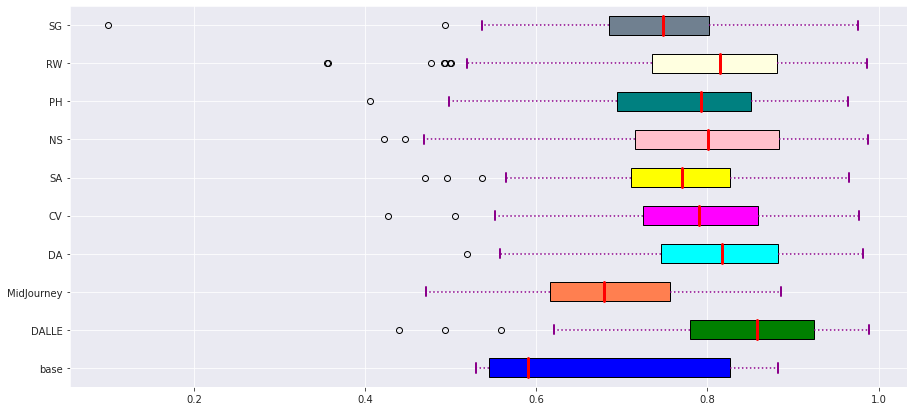

In [26]:
import matplotlib.pyplot as plt
colours = {'base': 'blue', 'dall_e_2': 'green', 'mid_journey': 'coral',  'dream':'cyan', 'CompVis': 'magenta', 'stabilityai': 'yellow',  'nitrosocke':'pink', 'prompthero': 'teal', 'runwayml': 'lightyellow', 'SG161222': 'slategrey' }

def get_colours(color_list):
    temp_color_list = []
    for color  in color_list:
        temp_color_list.append(colours[color])
    return temp_color_list

data_1 = df_final_graph.loc[df_final_graph['generator'] == 'base']['pred']
data_2 = df_final_graph.loc[df_final_graph['generator'] == 'dall_e_2']['pred']
data_3 = df_final_graph.loc[df_final_graph['generator'] == 'mid_journey']['pred']
data_4 = df_final_graph.loc[df_final_graph['generator'] == 'dream']['pred']
data_5 = df_final_graph.loc[df_final_graph['generator'] == 'CompVis']['pred']
data_6 = df_final_graph.loc[df_final_graph['generator'] == 'stabilityai']['pred']
data_7 = df_final_graph.loc[df_final_graph['generator'] == 'nitrosocke']['pred']
data_8 = df_final_graph.loc[df_final_graph['generator'] == 'prompthero']['pred']
data_9 = df_final_graph.loc[df_final_graph['generator'] == 'runwayml']['pred']
data_10 = df_final_graph.loc[df_final_graph['generator'] == 'SG161222']['pred']
data = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True, vert = 0)

name_id = ['base', 'dall_e_2', 'mid_journey', 'dream', 'CompVis', 'stabilityai', 'nitrosocke','prompthero', 'runwayml','SG161222' ]

for patch, color in zip(bp['boxes'], get_colours(name_id)):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# # changing style of fliers
# for flier in bp['fliers']:
#     flier.set(marker ='D',
#               color ='#e7298a',
#               alpha = 0.5)

# x-axis labels
ax.set_yticklabels(name_id)
ax.set_xlabel('Sentimenal value [0 negative, 1 positive]')

# Adding title
plt.title("Sentamental Score")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()